# AERONET AOD 550 INTERPOLATED TIME SERIES
The aim of this code is to show the interpolated AOD550 time series of each AERONET station

In [1]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import scipy.stats
from sklearn.metrics import mean_squared_error
from math import sqrt
import os
from os import listdir
from datetime import datetime
import pandas as pd
print("librerias ok")
# ubicacion de los archivos
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import matplotlib.dates as mdates


librerias ok


In [4]:
# AERONET station time series
def aeronet_plot (path, date_format,nrows,ncols,colors):
    '''
    The function allows plotting the daily averages of each AERONET station.
    The data of each station of interest is contained in a folder in .csv format previously processed.
    This function goes through the folder and takes each of these files to later make the plot of interest.

    Variables:
    - path : path to the folder where the files in .csv format are located
    - date_format: format of the date column of the file of interest. 
    For example: date_format='%Y-%m-%d %H:%M:%S'
    - nrows: number of rows the plot will have
    - ncols: number of columnas the plot will have
    - color palette for each of AERONET's stations For example: 
    colors = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"])
    
    '''
    i=0 
    j=0 
    fig, ax = plt.subplots(ncols=ncols,nrows=nrows,  figsize=(14,6),dpi=500)
    #The folder where the files of each station are located is browsed.
    for p,files in enumerate(os.listdir(path)):
        N = len(os.listdir(path))
        data = pd.read_csv(os.path.join(path,files))
        #A column is created with the date called "Timestamp".
        data["Timestamp"] = data["date"].apply(lambda x: datetime.strptime(x,date_format))
        #Becomes the index column
        data.set_index('Timestamp', inplace = True)
        # Media diaria
        data_mean  = data.resample('1D').mean()
        #The days of the study period are completed
        data_mean_period = data_mean ['2015-01-01':'2022-12-31']
        data_mean_period_len =len(data_mean_period.dropna(how='all'))
        # Station Name
        station_name = files [3:4]
        mean = data_mean_period['aod_550'].mean()    
        print(files)
        ########################                PLOT                ########################
        # Figure
        ax[i][j].plot(data_mean_period.index, data_mean_period.aod_550,c=colors[p])
              
        # Daily average text
        ax[i][j].text(data_mean_period.index[1],1.3, "Daily average =" +" "+ str(round(data_mean_period['aod_550'].mean(),2)),  
            ha="left", va="center",fontdict={'family': 'serif', 
            'color' : 'Black',
            'size': 9})
        
        # Daily average line
        ax[i][j].axhline(y=mean, color= "black",linewidth=1.5, alpha=0.6, linestyle = '-')
        
        # Daily lenth text
        ax[i][j].text(data_mean_period.index[1],1.2, "n =" +" "+ str(data_mean_period_len),  
            ha="left", va="center",fontdict={'family': 'serif', 
            'color' : 'Black',
            #'weight': 'bold',
            'size': 9})
        # Axes names
        ax[i][j].set_xlabel(r'$AOD_{AERONET}$',size=10)
        ax[i][j].set_ylabel(r'$AOD_{MAIAC}$',size=10)
        
        #Ticks
        ax[i][j].yaxis.set_ticks(np.arange(0.2, 1.6, 0.4))
        
        # Title of each subplot corresponds to the name of the AERONET station.
        ax[i][j].set_title(station_name,fontsize=13,fontdict={'family': 'serif', 
            'color' : 'Black',
            'weight': 'bold',
            'size': 16})
        # Day fotmat
        Format = mdates.DateFormatter('%m-%y')
        ax[i][j].xaxis.set_major_formatter(Format)
        ax[i][j].xaxis.set_major_locator(ticker.AutoLocator())
        ax[i][j].xaxis.set_minor_locator(ticker.AutoMinorLocator())
        ax[i][j].set_ylim(0,1.4)
        
        # Configuration of subplots
        plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.4)
        
        # Location of data in each subplot
        print(i,j,p,station_name)

        if j == ncols-1:
            i = i+1
            j = 0
        else:
            j = j+1
    
    return(plt.show())

BA_2015-2022_interp-s.csv
0 0 0 BA
LP_2015-2022_interp-s.csv
0 1 1 LP
MD_2015-2022_interp-s.csv
0 2 2 MD
MX_2015-2022_interp-s.csv
1 0 3 MX
SP_2015-2022_interp-s.csv
1 1 4 SP
ST_2015-2022_interp-s.csv
1 2 5 ST


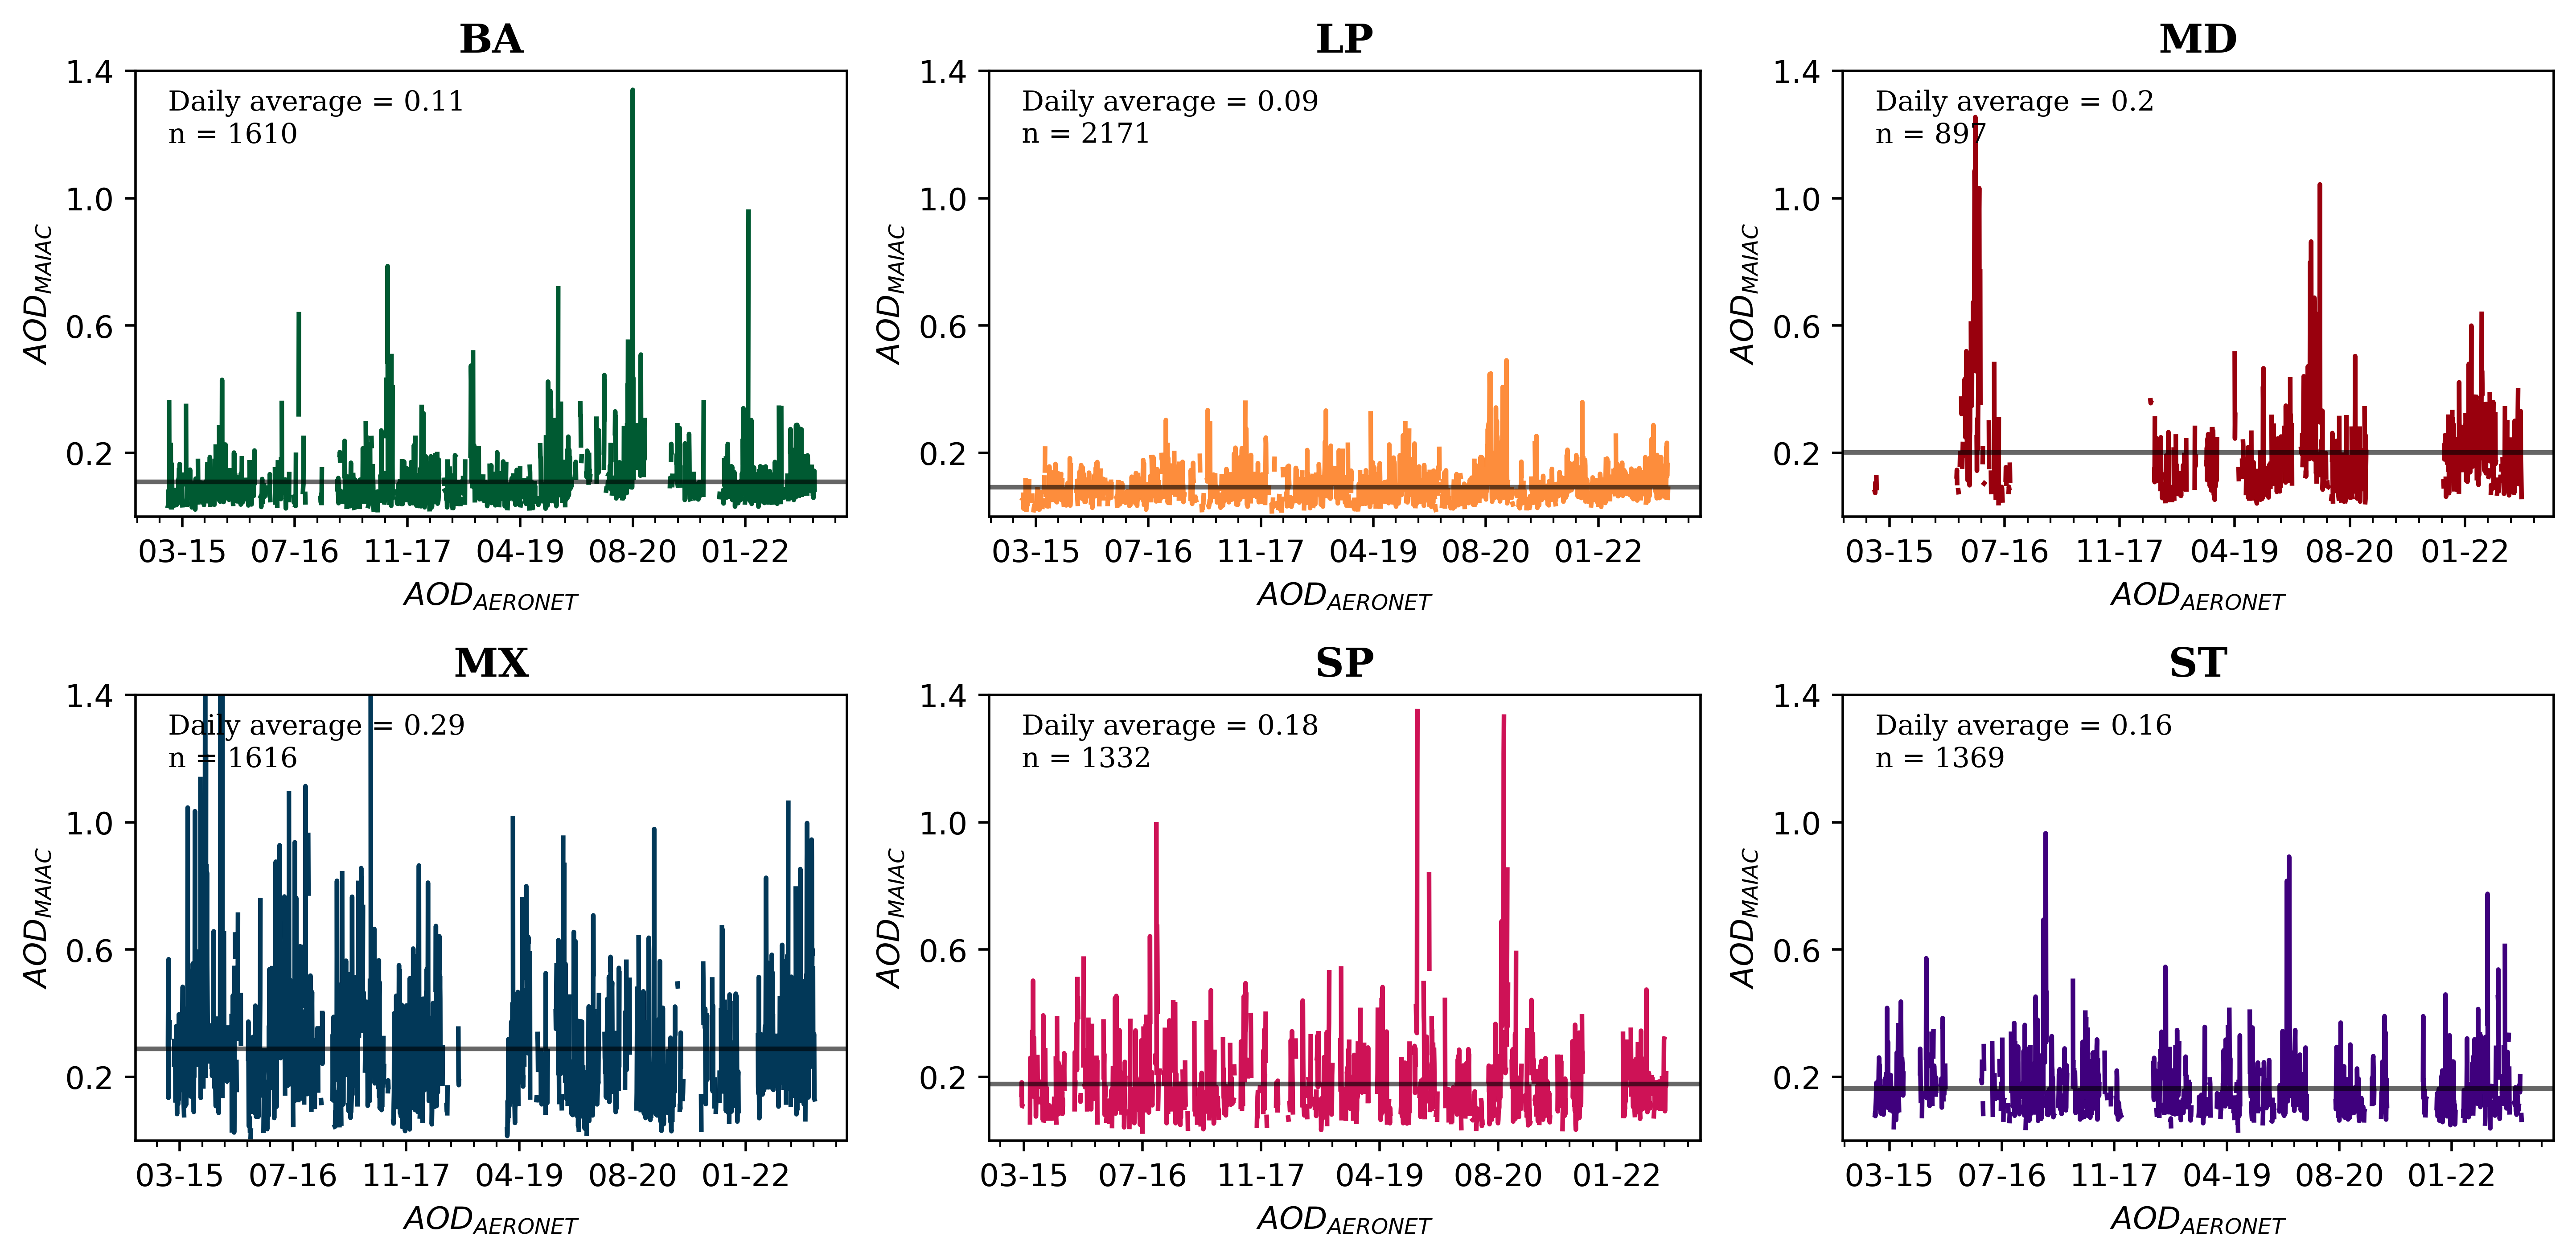

In [7]:
# Function for estimating AOD550 - QUADRATIC INTERPOLATION FUNCTION
aeronet_plot (path="D:/Josefina/Proyectos/PAPER/aeronet/datasets_interp_s",date_format='%Y-%m-%d %H:%M:%S',nrows=2,ncols=3,colors = ["#005a32","#fd8d3c","#99000d","#023858","#ce1256","#3f007d"])
